DESCRIPTION: Epidemiology and the SIR Model. Systems of linear differential equations.

# Epidemiology and the SIR Model

See:
* [Compartmental models in epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)
* [The SIR Model for Spread of Disease - The Differential Equation Model](https://maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)

## Goal
* Show how to use very basic programming techniques (loop, arithmetic, variables, print) to simulate and understand advanced college mathematical models, such as systems of linear differential equations.

## Overview

The SIR model (published in 1927 by Kermack and McKendrick) is a system of three linear differential equations that model how a pathogen moves through a population. The three numbers are:
* Suseptible - the people that haven't gotten sick yet but will eventually get sick. We start with the total population.
* Infected - the people that are currently sick.
* Recovered - the people that have recovered.

This model became popularized during Covid-19. Remember the phrase "Flatten the curve?" Well, that means doing things that lower the beta parameter so that the maximum number of people who are infected at the same time is smaller; i.e. flattening the I-curve so hospitals are not overloaded. Everyone still gets sick, but not all at the same time.

This model does not predict how many people will die. It assumes everyone will get the disease and all will recover.

## Key Points
* The underlying theory (in the wiki pages) uses math that you won't learn until college engineering classes.
* The code in this notebook, which simulates that math and plots it, uses very simple coding constructs: a loop, variable assignments, and simple math expressions that only use add, subtract, multiply, and divide.
* Therefore, you can use very simple programming techniques to simulate advanced mathematical equations.

In [99]:
from sympy import symbols, solve, simplify, factor, roots
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# INITIAL CONDITIONS

# The number of individuals. Start with a million people.
N = 1000000

# The number of susceptible individuals
S = N

# The number of infected individuals
I = 1
maxI = 0

# The number of recovered individuals
R = 0

# Beta (β) = The number of contacts per day that are sufficient to spread the disease. The average number of contacts 
# per person per time, multiplied by the probability of disease transmission in a contact between a susceptible 
# and an infectious subject
b = 3

# Gamma (γ) = The percent of the infected group will recover during any given day. 
# For example, if the average duration of infection is three days, then, on average, one-third of the 
# currently infected population recovers each day.
g = 0.33

# Time starts at zero
T = 0.0

# Time changes 1 day per step
dt = 1/24

# Create numpy arrays for the columns
t = []
s = []
i = []
r = []

print(f"""
Step      day          S          I          R 
---- -------- ---------- ---------- ----------
""")
for step in range(0, 1000):
    print(f"{step:>4} {T:>8.2f} {S:>10.0f} {I:>10.0f} {R:>10.0f}")
    
    t.append(T)
    s.append(S)
    i.append(I)
    r.append(R)
    
    ds = (-b * I * S / N) * dt
    di = (b * I * S / N - g * I) * dt
    dr = (k * I) * dt
    
    S = S + ds
    I = I + di
    R = R + dr
    T = T + dt
    
    if I > maxI: maxI = I
    
    # Stop if the recovery rate is above 99%. It never gets to exactly 100% but we need to stop at some point.
    if R > 0.99 * N:
        break
    
print(f"Max I = {maxI:,.0f}")


Step      day          S          I          R 
---- -------- ---------- ---------- ----------

   0     0.00    1000000          1          0
   1     0.04    1000000          1          0
   2     0.08    1000000          1          0
   3     0.12    1000000          1          0
   4     0.17     999999          2          0
   5     0.21     999999          2          0
   6     0.25     999999          2          0
   7     0.29     999999          2          0
   8     0.33     999999          2          0
   9     0.38     999998          3          0
  10     0.42     999998          3          0
  11     0.46     999998          3          0
  12     0.50     999997          4          0
  13     0.54     999997          4          0
  14     0.58     999996          4          0
  15     0.62     999996          5          0
  16     0.67     999995          5          1
  17     0.71     999994          6          1
  18     0.75     999994          7          1
  19     0

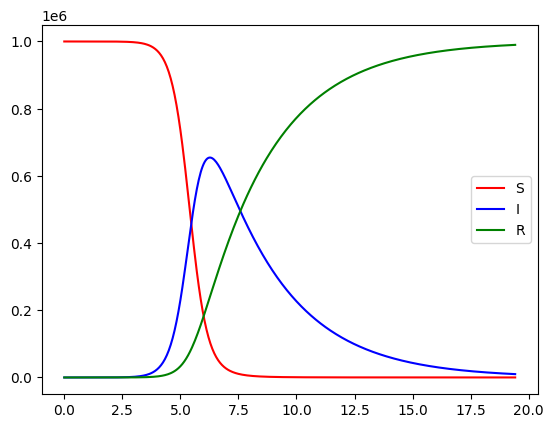

In [101]:
# Plot it
plt.plot(t, s, 'r', label="S")
plt.plot(t, i, 'b', label="I")
plt.plot(t, r, 'g', label="R")
plt.legend()
plt.show()

# Summary of Graph
* The RED line is the number of people that are going to get sick, but haven't gotten sick yet.
* The BLUE line is the number of people have started to get sick; i.e. got infected. This is the line that epidemiologists try to "flatten" by doing [Contact Tracing](https://en.wikipedia.org/wiki/Contact_tracing) and instituting
* The GREEN line is the number of people that have gotten sick, but have recovered and are well again.

Some popular epidemics that the SIR can model. Each have different beta and gamma constants:
*  541– 542 - Justinian Plague (Yersinia pestis, Bubonic Plague) - 15M to 100M deaths
* 1347-1351 - Black Death (Yersinia pestis, Bubonic Plague) - 75M to 200M deaths
* 1918-1920 - Spanish Flu (H1N1) 50M deaths
* 1957-1958 - Asian Flu (H2N2) 4M deaths
* 1968-1968 - Hong Kong Flu (H3N2) - 25M deaths
* 1981-PRES - HIV/AIDS (Lentivirus) - 42M deaths to date
* 2013–2016 - Ebola (Ebolavirus) - 13K deaths
* 2019-PRES - Covid-19 (Coronavirus) - 7M to 28M deaths to date